In [15]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [29]:
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.498751,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.395379,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.383556,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.261612,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.327446,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.702942,72.477501,72.495003,71.175003,71.205002,93121200


In [20]:
import ipynb
from YFLD import raw
from YFinance_CumuReturns import aapl

In [ ]:
raw


# Simple Moving Average

## goals:
#### * build intuition for rolling
##### * illustrate lambda
#### *  slicing


In [30]:
(aapl
     .assign(s1=aapl.Close.shift(1),
                s2=aapl.Close.shift(2),
                ma3=lambda df_:df_.loc[:,["Close", 's1', 's2']]
             .mean(axis='columns'),
                 ma3_builtin=aapl.Close.rolling(3)
                 .mean()
            )
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2010-01-04,6.487534,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,7.643214,NaN
2010-01-05,6.498751,7.656429,7.699643,7.616071,7.664286,601904800,7.643214,NaN,7.649822,NaN
2010-01-06,6.395379,7.534643,7.686786,7.526786,7.656429,552160000,7.656429,7.643214,7.611429,7.611429
2010-01-07,6.383556,7.520714,7.571429,7.466071,7.562500,477131200,7.534643,7.656429,7.570595,7.570595
2010-01-08,6.425996,7.570714,7.571429,7.466429,7.510714,447610800,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.261612,71.000000,71.062500,70.092499,70.132500,98572000,69.860001,70.004997,70.288333,70.288333
2019-12-24,69.327446,71.067497,71.222504,70.730003,71.172501,48478800,71.000000,69.860001,70.642499,70.642499
2019-12-26,70.702942,72.477501,72.495003,71.175003,71.205002,93121200,71.067497,71.000000,71.514999,71.514999


# Moving Averages Plotting

<AxesSubplot:xlabel='Date'>

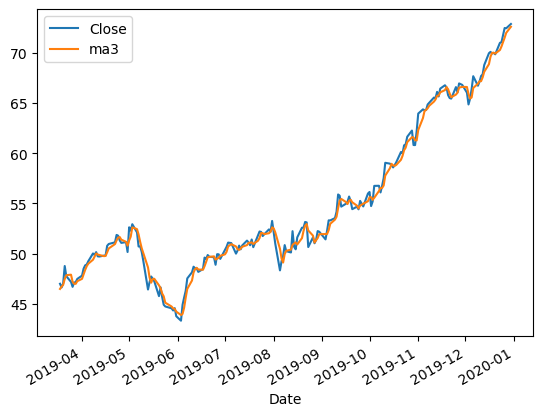

In [39]:
(aapl
     .assign(s1=aapl.Close.shift(1),
                s2=aapl.Close.shift(2),
                ma3=lambda df_:df_.loc[:,["Close", 's1', 's2']]
             .mean(axis='columns'),
                 ma3_builtin=aapl.Close.rolling(3).mean())
  [['Close', 'ma3']].iloc[-200:]
 .plot()
)

<AxesSubplot:xlabel='Date'>

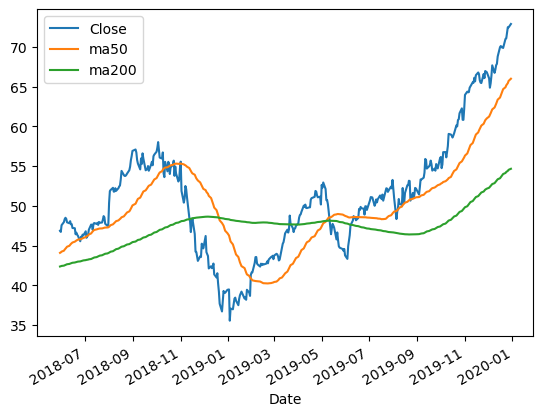

In [41]:
(aapl
 .assign(ma50=aapl.Close.rolling(50).mean(),
         ma200=aapl.Close.rolling(200).mean(),
        )
 [['Close', 'ma50', 'ma200']]
 .iloc[-400:]
 .plot()         
)

## Challenge
### Create a plot with three lines:
#### * AAPl close price in 2015
#### * Exponential moving average with alph= .0392
#### * Exponential moving average with alpha= .00995

### Hint:
#### * Use the .ewm method to create a rolling aggregator

<AxesSubplot:xlabel='Date'>

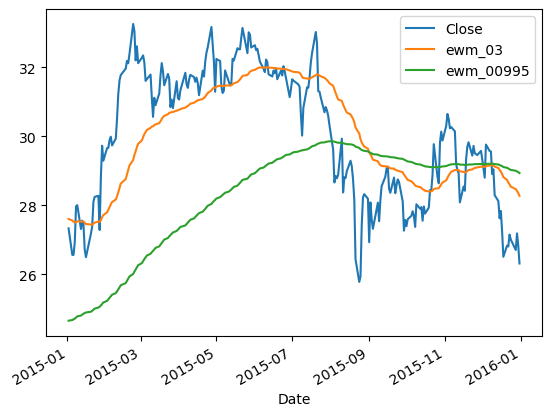

In [66]:
(aapl
 .assign(
     ewm_03=aapl.Close.ewm(alpha=0.0392).mean(),
     ewm_00995=aapl.Close.ewm(alpha=0.00995).mean())
 .loc["2015":"2015",['Close',"ewm_03","ewm_00995"]]
     .plot()
 
         )

